# Logistic Regression
To implement a logistic regression model predicting whether a student gets admitted into a university.

Suppose that you are the administrator of a university department and
you want to determine each applicant's chance of admission based on their
results on two exams. You have historical data from previous applicants
that you can use as a training set for logistic regression. For each training
example, you have the applicant's scores on two exams and the admissions
decision.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('datasets/ex2data1.txt', header=None, names=['exam1', 'exam2','admitted'])
df.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
X = df.drop('admitted', axis=1).values
y = df['admitted'].values.reshape(-1,1)

## EDA

In [4]:
def plotData(X, y):
    y = y.flatten()
    pos, neg = (y==1), (y==0)
    x1, x2 = X[:,0], X[:,1]
    plt.figure(figsize=(8,8))
    plt.plot(X[pos,0], X[pos,1], 'k+', linewidth=2, markersize=8, label='Admitted')
    plt.plot(X[neg,0], X[neg,1], 'yo', markersize=8, label='Not admitted')
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend()

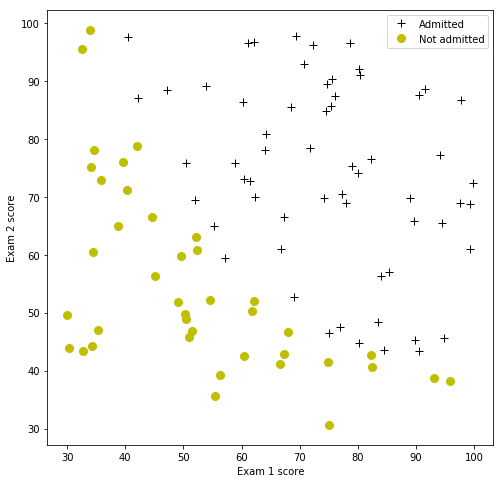

In [5]:
plotData(X, y)

In [6]:
m, n = X.shape

# Add intercept term (x0 = 1)
X = np.hstack((np.ones((m, 1)), X))

## Compute Cost and Gradient
Originally, from the lesson implemented using Octave, $\theta$ and gradient vectors are (n+1, 1) shape vector. <br>
In order to use scipy's minimize() function, it needs to be reshaped to (1, n+1) size. Also, Cost and Gradient function are to be separated.

In [7]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def costFunction(theta, X, y):
    theta = theta.reshape(-1,1)
    
    # compute hypothesis h(x)
    h = sigmoid(X @ theta)
    return np.sum(-y*np.log(h) - (1-y)*np.log(1-h)) / m

def gradientFunction(theta, X, y):
    m = len(y)
    theta = theta.reshape(-1,1)
    
    # compute hypothesis h(x)
    h = sigmoid(X @ theta)
    # compute gradients (theta_0, ... theta_n)
    grad = np.transpose(X) @ (h-y) / m
    
    return grad.flatten()

# Original implementation
# def costFunction(theta, X, y):
#     m = len(y)

#     # compute hypothesis h(x)
#     h = sigmoid(X @ theta)
    
#     # compute cost J of logistic regression
#     J = np.sum(-y*np.log(h) - (1-y)*np.log(1-h)) / m
    
#     # compute gradients (theta_0, ... theta_n)
#     grad = np.transpose(X) @ (h-y) / m
    
#     return J, grad

#### Test case: theta = [0; 0; 0]

In [8]:
initial_theta = np.zeros(n+1)
cost = costFunction(initial_theta, X, y)
grad = gradientFunction(initial_theta, X, y)
# costFunction(initial_theta, X, y)

print('Cost at initial theta (zeros): {}'.format(cost))
print('Expected cost (approx): 0.693\n')
print('Gradient at initial theta (zeros):\n{}'.format(grad))
print('Expected gradients (approx):\n[ -0.1 -12.0092 -11.2628 ]')

Cost at initial theta (zeros): 0.6931471805599453
Expected cost (approx): 0.693

Gradient at initial theta (zeros):
[ -0.1        -12.00921659 -11.26284221]
Expected gradients (approx):
[ -0.1 -12.0092 -11.2628 ]


#### Test case: theta = [-24; 0.2; 0.2]

In [9]:
test_theta = np.array([-24,0.2,0.2])
cost = costFunction(test_theta, X, y)
grad = gradientFunction(test_theta, X, y)

print('Cost at test theta: {}'.format(cost))
print('Expected cost (approx): 0.218\n')
print('Gradient at test theta:\n{}'.format(grad))
print('Expected gradients (approx):\n[ 0.043 2.566 2.647 ]')

Cost at test theta: 0.21833019382659785
Expected cost (approx): 0.218

Gradient at test theta:
[0.04290299 2.56623412 2.64679737]
Expected gradients (approx):
[ 0.043 2.566 2.647 ]


## Optimizing cost

In [10]:
from scipy.optimize import minimize

result = minimize(fun = costFunction,
                 x0 = initial_theta,
                 args = (X, y),
                 method = 'TNC',
                 jac = gradientFunction)
result

     fun: 0.20349770158947475
     jac: array([8.86249424e-09, 7.33646598e-08, 4.72732538e-07])
 message: 'Local minimum reached (|pg| ~= 0)'
    nfev: 36
     nit: 17
  status: 0
 success: True
       x: array([-25.1613186 ,   0.20623159,   0.20147149])

In [11]:
theta = result.x
print('Cost at theta: {}'.format(result.fun))
print('Expected cost (approx): 0.203\n')
print('Theta:\n{}'.format(result.x))
print('Expected theta (approx):\n[-25.161 0.206 0.201]')

Cost at theta: 0.20349770158947475
Expected cost (approx): 0.203

Theta:
[-25.1613186    0.20623159   0.20147149]
Expected theta (approx):
[-25.161 0.206 0.201]


### Plot decision boundary (linear)

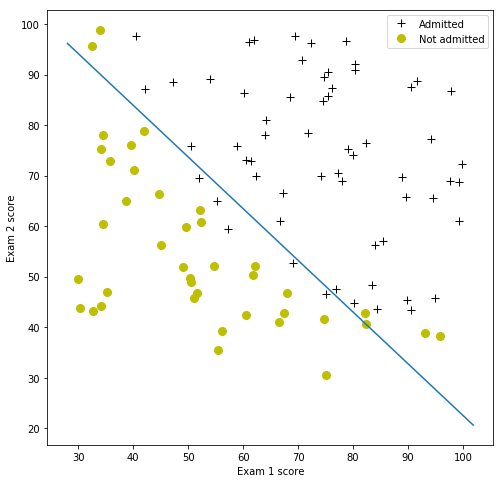

In [12]:
# 2 endpoints of x1 range
x1 = np.array([min(X[:,1]) - 2, max(X[:,1]) + 2])
x2 = -1/theta[2]*(theta[1] * x1 + theta[0])

plotData(X[:,1:3], y)
plt.plot(x1, x2);

## Predict and Accuracies
Predict probability for a student with score 45 and 85 for exam 1, 2 respectively.

In [13]:
theta = theta.reshape(-1,1)

prob = sigmoid(np.array([1,45,85]) @ theta)
print('For a student with scores 45 and 85, we predict an admission probability of\nProbablity: {}'.format(prob[0]))
print('Expected value: 0.775 +/- 0.002')

For a student with scores 45 and 85, we predict an admission probability of
Probablity: 0.7762906239711086
Expected value: 0.775 +/- 0.002


### Predict on the training set and measure accuracy

In [14]:
# predict on X
p = sigmoid(X @ theta) >= 0.5

acc = np.sum(p == y)

print('Train accuracy: {}'.format(acc))
print('Expected accuracy (approx): 89.0')

Train accuracy: 89
Expected accuracy (approx): 89.0


***
# Scikit-learn implementation

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


X2 = X[:,1:3]
y2 = y.flatten()

### LogisticRegression usiing scikit-learn

In [144]:
logreg = LogisticRegression(solver='newton-cg', max_iter=400)

# fit training data
logreg.fit(X2, y2)

# predict on the training data
y_pred = logreg.predict(X2)

print(confusion_matrix(y2, y_pred))
print(classification_report(y2, y_pred))

[[34  6]
 [ 5 55]]
             precision    recall  f1-score   support

          0       0.87      0.85      0.86        40
          1       0.90      0.92      0.91        60

avg / total       0.89      0.89      0.89       100



### Compare the result

In [147]:
print('Theta from exercise: {}'.format(theta.flatten()))
print('Theta from scikit-learn: {}\n'.format(
    np.append(logreg.intercept_, logreg.coef_)))

print('Accuracy from exercise: {}'.format(acc))
print('Accuracy from scikit-learn: {}\n'.format(np.sum(y_pred == y2)))
print(classification_report(y2, y_pred))

Theta from exercise: [-25.1613186    0.20623159   0.20147149]
Theta from scikit-learn: [-25.05200379   0.2053533    0.20058239]

Accuracy from exercise: 89
Accuracy from scikit-learn: 89

             precision    recall  f1-score   support

          0       0.87      0.85      0.86        40
          1       0.90      0.92      0.91        60

avg / total       0.89      0.89      0.89       100



### Actual Training (Pipeline, Scaling, Parameter Tuning)

In [148]:
steps = [('scaler', StandardScaler()),
        ('logreg', LogisticRegression())]

pipeline = Pipeline(steps)

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 50)
parameters = dict(logreg__C=c_space, logreg__penalty=['l1','l2'])

# Hold out test_data
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, 
                                                    stratify=y2, 
                                                    random_state=42)
# Create GridSearchCV
cv = GridSearchCV(pipeline, param_grid=parameters, cv=5)

# Fit to the training set
cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('logreg', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'logreg__C': array([1.00000e-05, 1.84207e-05, 3.39322e-05, 6.25055e-05, 1.15140e-04,
       2.12095e-04, 3.90694e-04, 7.19686e-04, 1.32571e-03, 2.44205e-03,
       4.49843e-03, 8.28643e-03, 1.52642e-02, 2.81177e-02, 5.17947e-02,
       9.54095e-02, 1.75751e-01, 3.23746e-01, 5.96362e-01, ... 8.68511e+06, 1.59986e+07, 2.94705e+07, 5.42868e+07, 1.00000e+08]), 'logreg__penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [149]:
print('Tuned parameters: {}'.format(cv.best_params_))
print('Best score: {}'.format(cv.best_score_))

Tuned parameters: {'logreg__C': 1.0985411419875595, 'logreg__penalty': 'l2'}
Best score: 0.9


#### Predict

In [150]:
y_pred = cv.predict(X_test)
print('Accuracy after tuning: {}\n'.format(cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))

Accuracy after tuning: 0.95

             precision    recall  f1-score   support

          0       0.89      1.00      0.94         8
          1       1.00      0.92      0.96        12

avg / total       0.96      0.95      0.95        20



In [ ]:
0.89 -> 0.95 accuracy on the ho